# Marginal CAC


In [129]:
import pandas as pd
import numpy as np

In [255]:
df=pd.read_csv('subscribers.csv')
df.head()

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True


In [252]:
# Check NA rows
df['account_creation_date'].isna().sum() 

0

In [248]:
df = df.dropna(subset=['account_creation_date'])
df.head()

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,creation_month
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True,1
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True,3
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,ar,NaN,14,False,0,NaN,NaN,NaN,True,12
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,ar,NaN,14,False,0,NaN,NaN,NaN,True,1
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True,10


In [ ]:
#extract account create date
df['account_creation_date']=pd.to_datetime(df['account_creation_date'], format='%Y-%m-%d %H:%M:%S')

df['creation_month'] = pd.DatetimeIndex(df['account_creation_date']).month
df['creation_month'].apply(lambda x: int(x))

In [72]:
#f.to_csv('month.csv')

In [84]:
df=pd.read_csv('monthssss.csv')
df.head()

,subid,attribution_technical,attribution_survey,account_creation_date
0,21724479,facebook,facebook,2020/1/24 21:44
1,23383224,facebook,facebook,2020/3/1 15:44
2,26844789,organic,facebook,2019/12/7 16:37
3,29417030,search,tv,2020/1/27 16:09
4,26723159,discovery,youtube,2019/10/5 12:57


In [85]:
#extract account create date
df['account_creation_date']=pd.to_datetime(df['account_creation_date'], format='%Y-%m-%d %H:%M')
df['creation_month'] = pd.DatetimeIndex(df['account_creation_date']).month
df['creation_month'].apply(lambda x: int(x))

0          1
1          3
2         12
3          1
4         10
          ..
227623    11
227624    12
227625    12
227626     1
227627    11
Name: creation_month, Length: 227628, dtype: int64

In [87]:
df.to_csv('monthssss.csv')

# Churn Model

In [57]:
import pandas as pd

In [74]:
df=pd.read_csv('subscribers.csv')
df.head()

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True


In [75]:
df['num_weekly_services_utilized'].isna().sum() 
df = df.dropna(subset=['age', 'male_TF','package_type','intended_use','weekly_consumption_hour','current_sub_TF','op_sys'])
#Change True and False to 0 and 1
df.replace(False, str(0), inplace=True)
df.replace(True, str(1), inplace=True)
df

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,1,...,0.1101,ar,NaN,14,0,0,NaN,NaN,NaN,1
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,0,...,0.0367,ar,NaN,14,0,0,NaN,NaN,NaN,1
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,0,...,0.0367,ar,NaN,14,1,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,1
6,192823,29726122,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,0,...,0.3303,ar,Standard Charter,14,1,1,2020-03-04 18:30:15,2020-07-04 18:30:15,NaN,1
7,315863,20299962,base,3.0,drama,access to exclusive content,34.551230,2.0,23.0,0,...,0.0000,ar,RAKBANK,14,1,1,2020-03-19 14:52:22,2020-07-19 14:52:22,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227622,603751,25835684,base,2.0,drama,access to exclusive content,24.401536,2.0,43.0,0,...,0.0000,ar,NaN,14,1,1,2020-01-15 22:43:56,2020-05-15 22:43:56,NaN,1
227623,509326,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,0,...,0.3303,ar,NaN,14,1,1,2019-12-01 14:12:33,2020-04-01 14:12:33,NaN,1
227624,229587,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,0,...,0.3303,ar,Paypal,14,1,1,2019-12-20 18:02:13,2020-04-20 18:02:13,NaN,1
227625,281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,0,...,0.0367,ar,NaN,14,1,1,2020-01-04 19:40:44,2020-05-04 19:40:44,NaN,1


In [76]:
df.to_csv('churn_need_to_delete_age.csv')

In [428]:
df=pd.read_csv('churn_age_deleted.csv')

In [429]:
df = df.drop(['Unnamed: 0','Unnamed: 0.1',
              'country','subid','language',
              'payment_type', 'num_trial_days',
              'last_payment','next_payment',
              'cancel_date', 'months_per_bill_period', 
              'account_creation_date','trial_end_date',
              'initial_credit_card_declined','plan_type',
              'current_sub_TF',
              'discount_price','op_sys','payment_period'],axis=1)
df.head()

,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_technical,attribution_survey,monthly_price,join_fee,trial_completed
0,base,NaN,comedy,replace OTT,27.301448,NaN,19.0,0,google_organic,tv,4.7343,0.0367,1
1,base,2.0,comedy,replace OTT,20.051667,2.0,21.0,0,search,other,4.7343,0.0367,1
2,enhanced,NaN,drama,supplement OTT,41.801011,NaN,24.0,1,facebook,facebook,4.7343,0.0367,1
3,base,NaN,comedy,access to exclusive content,21.501623,NaN,25.0,0,youtube,youtube,4.7343,0.3303,1
4,base,NaN,comedy,access to exclusive content,25.851492,NaN,25.0,0,other,tv,4.7343,0.0367,1


In [430]:
list(df.columns) 

['package_type',
 'num_weekly_services_utilized',
 'preferred_genre',
 'intended_use',
 'weekly_consumption_hour',
 'num_ideal_streaming_services',
 'age',
 'male_TF',
 'attribution_technical',
 'attribution_survey',
 'monthly_price',
 'join_fee',
 'trial_completed']

In [431]:
df = pd.get_dummies(df, columns=['package_type', 'preferred_genre',
                                 'intended_use','attribution_technical',
                                 'attribution_survey','monthly_price','join_fee'])

In [432]:
df = df.dropna(subset=['num_weekly_services_utilized','num_ideal_streaming_services'])

In [406]:
df

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,trial_completed,package_type_economy,package_type_enhanced,preferred_genre_drama,preferred_genre_international,...,join_fee_0.2569,join_fee_0.2936,join_fee_0.3303,join_fee_0.36700000000000005,join_fee_0.4037,join_fee_0.5872,join_fee_0.6239,join_fee_0.6606,join_fee_0.6973,join_fee_0.7340000000000001
1,2.0,20.051667,2.0,21.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.0,21.501623,2.0,26.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3.0,27.301448,2.0,31.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2.0,33.101274,2.0,33.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3.0,40.351055,2.0,34.0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144466,3.0,34.551230,2.0,18.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
144468,3.0,31.651317,2.0,18.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
144471,4.0,34.551230,2.0,18.0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
144472,2.0,25.851492,2.0,18.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [387]:
#df.to_csv('churn.csv')

In [407]:
df.isna().sum() 

num_weekly_services_utilized    0
weekly_consumption_hour         0
num_ideal_streaming_services    0
age                             0
male_TF                         0
                               ..
join_fee_0.5872                 0
join_fee_0.6239                 0
join_fee_0.6606                 0
join_fee_0.6973                 0
join_fee_0.7340000000000001     0
Length: 84, dtype: int64

In [408]:
cor = df.corr()
cor

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,trial_completed,package_type_economy,package_type_enhanced,preferred_genre_drama,preferred_genre_international,...,join_fee_0.2569,join_fee_0.2936,join_fee_0.3303,join_fee_0.36700000000000005,join_fee_0.4037,join_fee_0.5872,join_fee_0.6239,join_fee_0.6606,join_fee_0.6973,join_fee_0.7340000000000001
num_weekly_services_utilized,1.000000,0.392307,0.543172,0.027816,0.245050,0.137216,0.039139,-0.047941,0.116006,0.135000,...,-0.000046,-0.000065,0.014782,-0.003822,-0.000046,-0.000046,0.003890,0.031647,0.004094,-0.000046
weekly_consumption_hour,0.392307,1.000000,0.076561,-0.017777,0.573630,0.078348,0.002020,0.027120,0.039386,0.015781,...,-0.001483,-0.000733,0.001706,0.019695,-0.001352,0.001130,-0.000522,0.034212,0.002621,0.004382
num_ideal_streaming_services,0.543172,0.076561,1.000000,-0.021596,0.016940,0.064311,0.011090,-0.003776,0.062929,0.110942,...,-0.000816,-0.001155,-0.002588,-0.006313,-0.000816,-0.000816,-0.001633,0.011586,0.002417,-0.000816
age,0.027816,-0.017777,-0.021596,1.000000,0.042230,-0.103324,0.131552,-0.164597,0.117069,0.063845,...,0.003803,0.000200,0.083619,0.036660,0.000528,-0.000766,-0.002444,0.133585,0.008666,0.005764
male_TF,0.245050,0.573630,0.016940,0.042230,1.000000,0.002952,0.024022,0.017857,0.066186,0.012347,...,-0.001259,-0.001781,0.012197,0.039078,-0.001259,-0.001259,0.002385,0.062996,-0.000094,0.008547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
join_fee_0.5872,-0.000046,0.001130,-0.000816,-0.000766,-0.001259,0.001105,-0.001079,-0.002358,-0.001856,-0.000649,...,-0.000011,-0.000015,-0.001432,-0.000314,-0.000011,1.000000,-0.000022,-0.000948,-0.000030,-0.000011
join_fee_0.6239,0.003890,-0.000522,-0.001633,-0.002444,0.002385,-0.003209,0.003369,-0.001256,-0.003713,-0.001299,...,-0.000022,-0.000030,-0.002864,-0.000629,-0.000022,-0.000022,1.000000,-0.001896,-0.000061,-0.000022
join_fee_0.6606,0.031647,0.034212,0.011586,0.133585,0.062996,-0.009797,0.033300,-0.028896,0.031389,0.009087,...,-0.000948,-0.001341,-0.126169,-0.027701,-0.000948,-0.000948,-0.001896,1.000000,-0.002682,-0.000948
join_fee_0.6973,0.004094,0.002621,0.002417,0.008666,-0.000094,0.003127,0.000857,-0.004223,0.002867,0.004252,...,-0.000030,-0.000043,-0.004051,-0.000889,-0.000030,-0.000030,-0.000061,-0.002682,1.000000,-0.000030


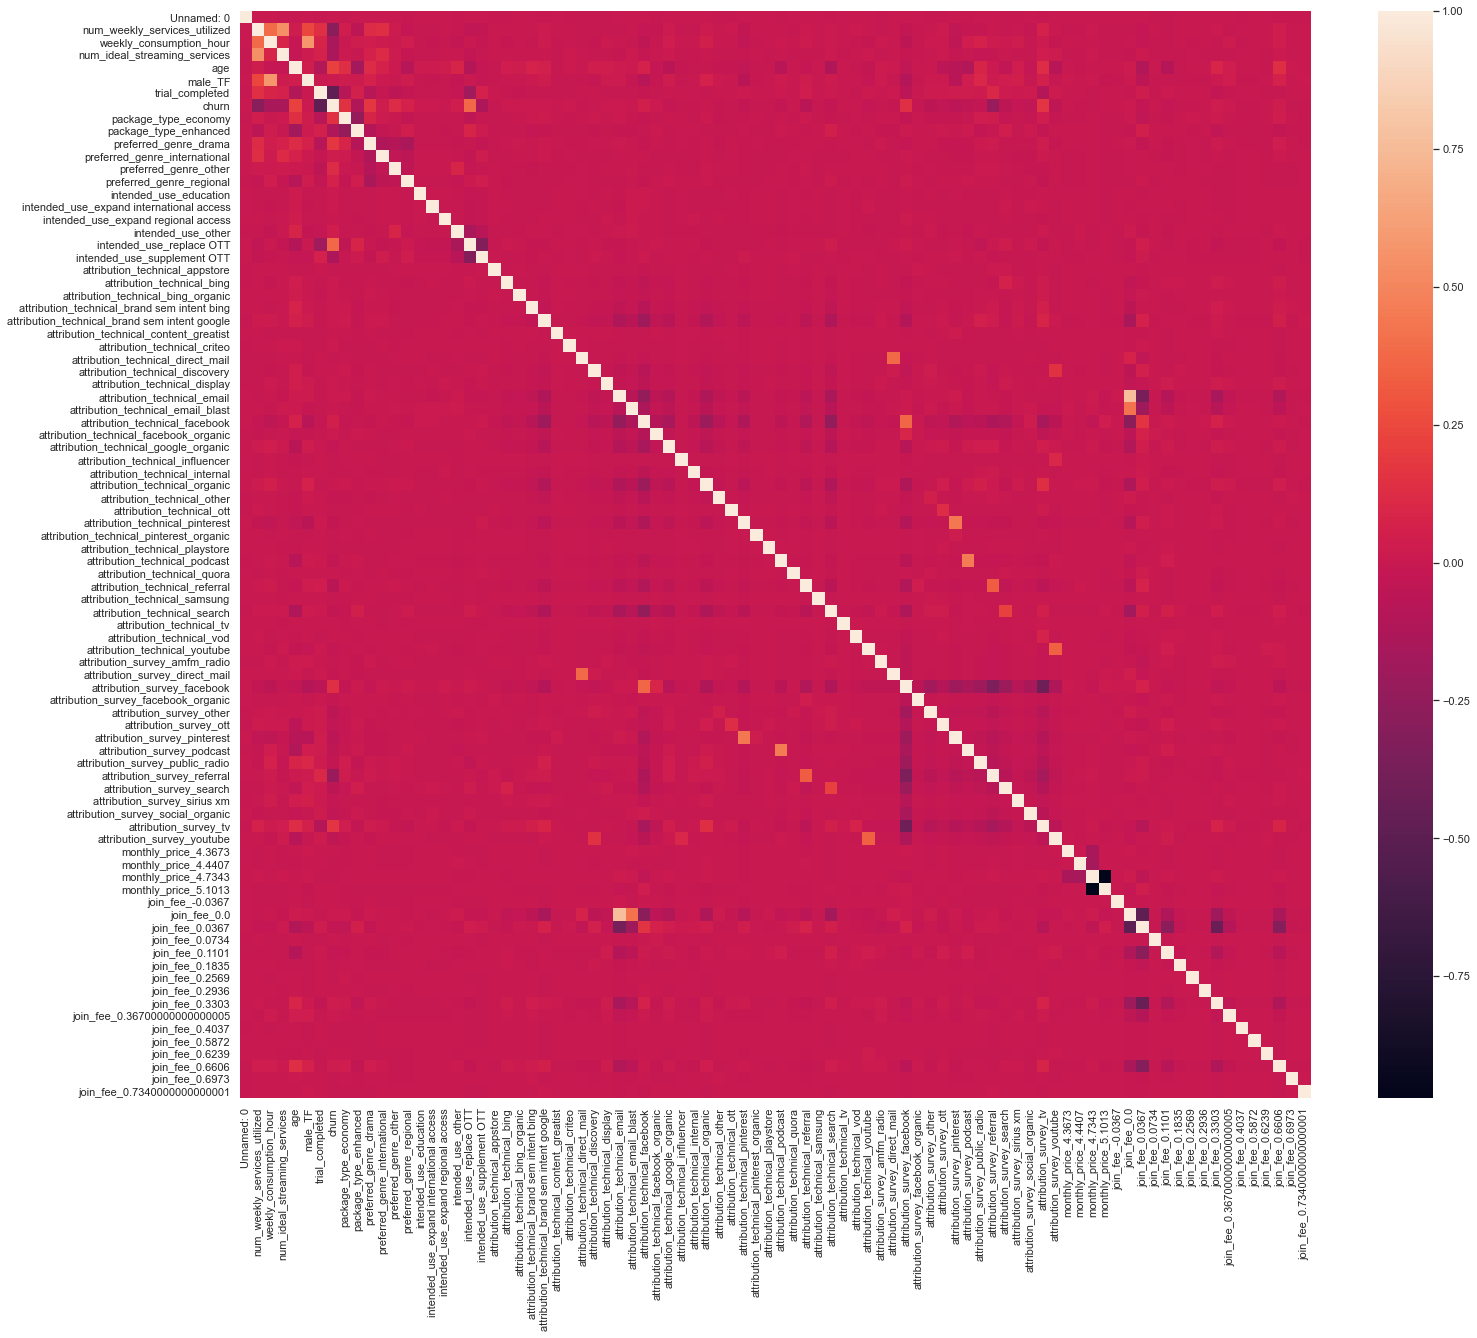

In [44]:
#Using Pearson Correlation
plt.figure(figsize=(24,20))
sns.heatmap(cor)
plt.show()

In [409]:
#cor.to_csv('corr.csv')

In [423]:
coeff = cor

# 0.3 is used for illustration 
# replace with your actual value
thresh = 0.7

mask = coeff.abs()> thresh
# or mask = coeff < thresh

coeff.where(mask).stack()

num_weekly_services_utilized  num_weekly_services_utilized    1.0
weekly_consumption_hour       weekly_consumption_hour         1.0
num_ideal_streaming_services  num_ideal_streaming_services    1.0
age                           age                             1.0
male_TF                       male_TF                         1.0
                                                             ... 
join_fee_0.5872               join_fee_0.5872                 1.0
join_fee_0.6239               join_fee_0.6239                 1.0
join_fee_0.6606               join_fee_0.6606                 1.0
join_fee_0.6973               join_fee_0.6973                 1.0
join_fee_0.7340000000000001   join_fee_0.7340000000000001     1.0
Length: 88, dtype: float64

In [421]:
high_corr

['attribution_technical_email']

In [378]:
#Correlation with output variable
cor_target = abs(cor["churn"])
cor_target

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

payment_period     0.850974
trial_completed    0.480506
churn              1.000000
Name: churn, dtype: float64

## building the churn model

### logistic regression model

In [517]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import sklearn.metrics as metrics
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [528]:
df=pd.read_csv('churn.csv')
df

,Unnamed: 0,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,trial_completed,churn,package_type_economy,package_type_enhanced,...,join_fee_0.2569,join_fee_0.2936,join_fee_0.3303,join_fee_0.36700000000000005,join_fee_0.4037,join_fee_0.5872,join_fee_0.6239,join_fee_0.6606,join_fee_0.6973,join_fee_0.7340000000000001
0,110205,2,20.051667,2,21.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,51966,2,21.501623,2,26.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,57631,3,27.301448,2,31.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,84864,2,33.101274,2,33.0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,86857,3,40.351055,2,34.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89054,137306,3,34.551230,2,18.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
89055,137692,3,31.651317,2,18.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
89056,137982,4,34.551230,2,18.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
89057,137989,2,25.851492,2,18.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [519]:
# logistic Model
feature_x = [tag for tag in df.columns if tag not in ['churn','payment_period','trial_completed ']]
X = df[feature_x].values
y = df['churn']

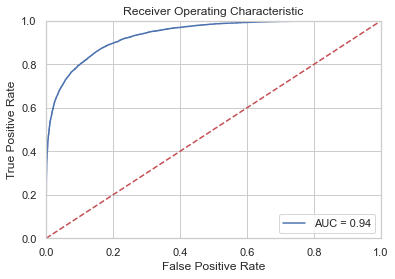

<Figure size 7200x7200 with 0 Axes>

In [520]:
# training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#running the model
logistic_regression= LogisticRegression(max_iter=200000)
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

probs = logistic_regression.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.figure(figsize=(100,100))
plt.show()

In [532]:
feature_x = [tag for tag in df.columns if tag not in ['churn','payment_period','trial_completed ']]
X = df[feature_x].values
y = df['churn']

In [535]:
logistic_regression= LogisticRegression(max_iter=200000)
logistic_regression.fit(X,y)
y_pred=logistic_regression.predict(X)
probs = logistic_regression.predict_proba(X)
preds = probs[:,1]

In [536]:
df['probs']= preds

In [538]:
df.to_csv('churn_with_pred.csv')

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

### decision tree model

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
df=pd.read_csv('churn.csv')
df

,Unnamed: 0,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,trial_completed,churn,package_type_economy,package_type_enhanced,...,join_fee_0.2569,join_fee_0.2936,join_fee_0.3303,join_fee_0.36700000000000005,join_fee_0.4037,join_fee_0.5872,join_fee_0.6239,join_fee_0.6606,join_fee_0.6973,join_fee_0.7340000000000001
0,110205,2,20.051667,2,21.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,51966,2,21.501623,2,26.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,57631,3,27.301448,2,31.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,84864,2,33.101274,2,33.0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,86857,3,40.351055,2,34.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89054,137306,3,34.551230,2,18.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
89055,137692,3,31.651317,2,18.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
89056,137982,4,34.551230,2,18.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
89057,137989,2,25.851492,2,18.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


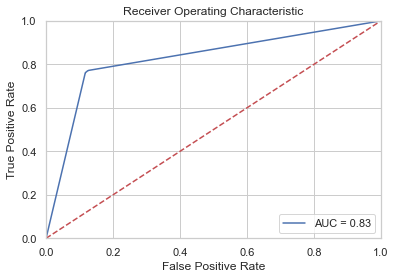

<Figure size 7200x7200 with 0 Axes>

In [59]:
feature_x = [tag for tag in df.columns if tag not in ['churn','payment_period','Unnamed: 0']]
X = df[feature_x].values
y = df['churn']
# training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.figure(figsize=(100,100))
plt.show()


### Random Forest Model

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [148]:
df= pd.read_csv('churn.csv')
df

,Unnamed: 0,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,trial_completed,churn,package_type_economy,package_type_enhanced,...,join_fee_0.2569,join_fee_0.2936,join_fee_0.3303,join_fee_0.36700000000000005,join_fee_0.4037,join_fee_0.5872,join_fee_0.6239,join_fee_0.6606,join_fee_0.6973,join_fee_0.7340000000000001
0,110205,2,20.051667,2,21.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,51966,2,21.501623,2,26.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,57631,3,27.301448,2,31.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,84864,2,33.101274,2,33.0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,86857,3,40.351055,2,34.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89054,137306,3,34.551230,2,18.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
89055,137692,3,31.651317,2,18.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
89056,137982,4,34.551230,2,18.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
89057,137989,2,25.851492,2,18.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [149]:
feature_x = [tag for tag in df.columns if tag not in ['churn','payment_period','trial_completed','Unnamed: 0']]
X = df[feature_x].values
y = df['churn']
# training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
clf = RandomForestClassifier(n_estimators=100)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

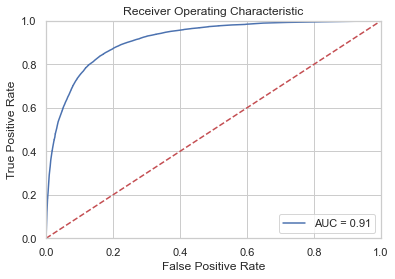

<Figure size 7200x7200 with 0 Axes>

In [152]:
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.figure(figsize=(100,100))
plt.show()

# Customer Segmentation

In [366]:
import pandas as pd

In [487]:
df=pd.read_csv('churn_age_deleted.csv')

In [488]:
df= df.drop(['Unnamed: 0','Unnamed: 0.1',
              'last_payment',
              'next_payment','language',
              'payment_type','num_trial_days', 'trial_end_date','plan_type',
              'months_per_bill_period', 'country','monthly_price','discount_price','trial_completed'],axis=1)

In [489]:
list(df.columns)

['subid',
 'package_type',
 'num_weekly_services_utilized',
 'preferred_genre',
 'intended_use',
 'weekly_consumption_hour',
 'num_ideal_streaming_services',
 'age',
 'male_TF',
 'attribution_technical',
 'attribution_survey',
 'op_sys',
 'account_creation_date',
 'initial_credit_card_declined',
 'join_fee',
 'current_sub_TF',
 'payment_period',
 'cancel_date']

In [490]:
df.cancel_date = pd.notna(df.cancel_date)
df.replace(False, str(0), inplace=True)
df.replace(True, str(1), inplace=True)

#extract account create date
df['account_creation_date']=pd.to_datetime(df['account_creation_date'], format='%Y-%m-%d %H:%M')
df['account_creation_month'] = pd.DatetimeIndex(df['account_creation_date']).month
df['account_creation_hour'] = pd.DatetimeIndex(df['account_creation_date']).hour
df= df.drop(['account_creation_date'],axis=1)
df.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_technical,attribution_survey,op_sys,initial_credit_card_declined,join_fee,current_sub_TF,payment_period,cancel_date,account_creation_month,account_creation_hour
0,22728052,base,NaN,comedy,replace OTT,27.301448,NaN,19.0,0,google_organic,tv,iOS,1,0.0367,0,0,0,2,2
1,20911514,base,2.0,comedy,replace OTT,20.051667,2.0,21.0,0,search,other,iOS,0,0.0367,0,1,1,10,0
2,24304724,enhanced,NaN,drama,supplement OTT,41.801011,NaN,24.0,1,facebook,facebook,Android,0,0.0367,1,1,0,11,9
3,27668106,base,NaN,comedy,access to exclusive content,21.501623,NaN,25.0,0,youtube,youtube,iOS,1,0.3303,1,1,0,1,14
4,27364513,base,NaN,comedy,access to exclusive content,25.851492,NaN,25.0,0,other,tv,Android,0,0.0367,0,1,1,9,17


In [491]:
#df=pd.read_csv('churn_age_deleted.csv')
df.to_csv('data_before_cluster.csv')

In [480]:
df = pd.get_dummies(df, columns=['package_type','num_weekly_services_utilized', 
                                 'preferred_genre','intended_use','num_ideal_streaming_services',
                                 'attribution_technical','attribution_survey','op_sys',
                                 'join_fee'],drop_first=True)
df.head()

,subid,weekly_consumption_hour,age,male_TF,initial_credit_card_declined,current_sub_TF,payment_period,cancel_date,account_creation_month,account_creation_hour,...,join_fee_0.2569,join_fee_0.2936,join_fee_0.3303,join_fee_0.36700000000000005,join_fee_0.4037,join_fee_0.5872,join_fee_0.6239,join_fee_0.6606,join_fee_0.6973,join_fee_0.7340000000000001
0,22728052,27.301448,19.0,0,1,0,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0
1,20911514,20.051667,21.0,0,0,0,1,1,10,0,...,0,0,0,0,0,0,0,0,0,0
2,24304724,41.801011,24.0,1,0,1,1,0,11,9,...,0,0,0,0,0,0,0,0,0,0
3,27668106,21.501623,25.0,0,1,1,1,0,1,14,...,0,0,1,0,0,0,0,0,0,0
4,27364513,25.851492,25.0,0,0,0,1,1,9,17,...,0,0,0,0,0,0,0,0,0,0


In [481]:
X =list(df.columns) 
#feature_x = [tag for tag in df.columns if tag not in ['subid']]
#x = df[feature_x].values

import pandas as pd
from sklearn import preprocessing
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

df.columns = X


dk=pd.read_csv('churn_age_deleted.csv')
df['subid']=dk['subid']
df

,subid,weekly_consumption_hour,age,male_TF,initial_credit_card_declined,current_sub_TF,payment_period,cancel_date,account_creation_month,account_creation_hour,...,join_fee_0.2569,join_fee_0.2936,join_fee_0.3303,join_fee_0.36700000000000005,join_fee_0.4037,join_fee_0.5872,join_fee_0.6239,join_fee_0.6606,join_fee_0.6973,join_fee_0.7340000000000001
0,22728052,0.546667,0.036145,0.0,1.0,0.0,0.000000,0.0,0.090909,0.086957,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20911514,0.480000,0.060241,0.0,0.0,0.0,0.333333,1.0,0.818182,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24304724,0.680000,0.096386,1.0,0.0,1.0,0.333333,0.0,0.909091,0.391304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27668106,0.493333,0.108434,0.0,1.0,1.0,0.333333,0.0,0.000000,0.608696,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27364513,0.533333,0.108434,0.0,0.0,0.0,0.333333,1.0,0.727273,0.739130,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144474,20520015,0.520000,0.024096,0.0,0.0,1.0,0.333333,0.0,0.181818,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144475,24013612,0.506667,0.024096,0.0,1.0,1.0,0.333333,0.0,0.090909,0.695652,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144476,27574084,0.533333,0.024096,0.0,0.0,1.0,0.666667,0.0,0.727273,0.565217,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144477,24609155,0.520000,0.024096,0.0,0.0,1.0,0.666667,0.0,0.727273,0.913043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [482]:
feature_x = [tag for tag in df.columns if tag not in ['subid']]
X = df[feature_x].values

{1: 1.19992249077925e+18, 2: 2.998302774229002e+17, 3: 1.3359799678858208e+17, 4: 7.505800413564173e+16, 5: 4.830796155745822e+16, 6: 3.3480829386857996e+16, 7: 2.4569632521056896e+16, 8: 1.8803970925955456e+16, 9: 1.4853626362594034e+16, 10: 1.2046589755724762e+16, 11: 9903737175758412.0, 12: 8355647463242822.0, 13: 7131476391443369.0, 14: 6150940234456632.0, 15: 5347640537085680.0, 16: 4705830559111718.0, 17: 4164617263361364.0, 18: 3704923705928826.5, 19: 3335437319579032.0}


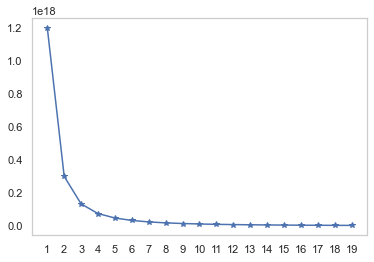

In [483]:
import matplotlib.pyplot as plt
from sklearn. cluster import KMeans

inertias = {}
for k in range(1,20):
    kmeans = KMeans(n_clusters=k, random_state=2020)
    kmeans.fit(df)
    inertias[k] = kmeans.inertia_
print(inertias)


ax = plt.subplot()
ax.plot(list(inertias.keys()), list(inertias.values()), '-*')
ax.set_xticks(np.arange(1, 20))
ax.grid()
plt.show()

In [484]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=2020)
y_pred = kmeans.fit_predict(X)
df['cluster']=y_pred

In [486]:
df.to_csv('data_cluster.csv')

In [386]:
def visualize_cluster_result(x, dim1, dim2, y_pred, k):
    # select two feature dims: dim1, dim2, visualize the clusters
    assert dim1 in range(x.shape[1])
    assert dim2 in range(x.shape[1])
    ax = plt.subplot()
    # use a for loop to plot each cluster (with different colors)
    for i in range(k):
        ax.scatter(x[y_pred == i, dim1], x[y_pred ==  i, dim2], label='cluster: %d' % i)
    plt.title('Visualization of clustering of dim %d and dim %d' % (dim1, dim2))
    ax.set_xlabel('dim: %d' % dim1)
    ax.set_ylabel('dim: %d' % dim2)
    ax.legend()
    plt.show()

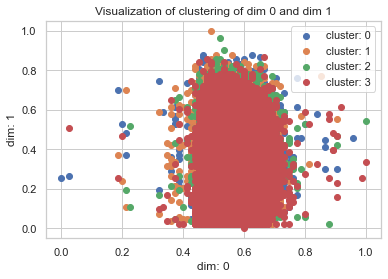

In [400]:
visualize_cluster_result(X, 0, 1, y_pred, k)

In [493]:
df1=pd.read_csv('data_before_cluster.csv')
df2=pd.read_csv('data_cluster.csv')

In [494]:
df1['cluster']=df2['cluster']

In [495]:
df1.to_csv('data_cluster_final.csv')